# Grundlagen zur Kartendarstellung

Zunächst beginnen wir mit etwas Hintergrundwissen zur Kartendarstellung. 
Alle folgenden Codebeispiele arbeiten mit Daten, die einen Ortsbezug haben. Im Englischen spricht man von spatial data. Dieser Bezug liegt in der Regel in Form von Koordinaten-Daten vor: 

Der Erdball wird zunächst in 180 Breitengrade und 360 Längengrade eingeteilt.
- Breitengrade verlaufen parallel zum Äquator. Auf einer genordeten Karte sind sie annähernd waagerecht.
- Längengrade verbinden Nord- und Südpol. Auf einer genordeten Karte sind sie senkrecht.<br>

So entsteht ein grobmaschiges Gitter, anhand dessen man die ungefähre Position auf der Erdoberfläche angeben kann.

### Das Sexagesimalsystem
Das ist die traditionalle Schreibweise. Dies ist ein Zahlensystem, das auf der Zahl 60 basiert. Hier bestehen die Koordinaten aus drei Kompenenten:
- Längen- und Breitengrade werden als Winkel (°) angegeben.
- Jeder Grad hat 60 Minuten. Diese werden durch eine Prime (′) gekennzeichnet.
- Jede Minute hat 60 Sekunden, die anhand einer Doppelprime (″) erkennbar sind. 

So hat die Zugspitze die Koordinaten 47°25′16″N, 10°59′7″O.

![alt text](longitude-and-latitude-de-simple.png  "Längen und Breitengrad")

### Die Dezimalschreibweise
Parallel zum traditionell gebräuchlichen Sexagesimalsystem hat sich zusätzlich die Angabe der Koordinaten im Dezimalsystem etabliert. Auch die in diesem Kapitel vorgestellten Bibliotheken erwarten alle Koordinaten im Dezimalsystem. 
- Die Koordinaten der Zugspitze sieht dann folgendermaßen aus: 47.4211, 10.9852.

Orten auf der West- und Südhalbkugel wird ein Minus (-) vorangestellt. Machu Picchu, auf dem westlichen Teil der Südhalbkugel gelegen, hat die Koordinaten
-13.163333, -72.545556. <br>

Quelle: https://www.timeanddate.de/geographie/laengengrad-breitengrad

### Geodätische Systeme

Da die Erde kein perfektes Ellipsoid darstellt, ist die oben angenommene gleichmäßige Unterteilung in Längen- und Breitengrade nicht möglich. Zusätzlich kommt erschwerend hinzu, dass sich die Kontinentalplatten ständig verschieben. Es existieren unterschiedliche Systeme, die diesen Abweichungen Rechnung tragen. Das wohl verbreitetste System ist WGS84 (World Geodetic System 1984). Google verwendet wiederum für seine Karten ein leicht abgewandeltes System (EPSG:3857). Gerade im europäischen Raum trifft man oft auf ein für diese Region angepasstes System mit dem Namen ETRS89 (Europäisches Terrestrisches Referenzsystem 1989).<br>
Alle im folgenden vorgestellten Bibliotheken nutzen das erwähnte WGS84 System. 

### Projektion

Es gibt zahlreiche Möglichkeiten die Oberfläche eines dreidimensionalen Körpers wie der Erde auf eine zweidimensionale Darstellung abzubilden. Hierbei unterscheidet man zwischen
- **Längentreue Abbildungen** <br>
Diese Abbildungen sind nicht absolut längentreu, sondern lassen nur entlang weiterer Linien als den Berühr- bzw. Schnittkreisen längentreue Messungen zu. <br>
Beispiel: Quadratische Plattkarte<br>
![equi](Equirectangular-projection.jpg "")
- **Flächentreue Abbildungen** <br>
Diese Abbildungen stellen die Größe einer Fläche (z. B. eines Kontinents) korrekt dar. Die Form kann allerdings sehr stark verzerrt werden. Insbesondere am Kartenrand neigen diese Abbildungen zu starken Formverzerrungen. Beispiel: Albers-Kegelprojektion
![albers](Albers-equal-area-conic.png "")
- **Winkeltreue Abbildungen** <br> Winkeltreue Abbildungen werden insbesondere bei der Navigation in der Schifffahrt und im Flugverkehr zur Erstellung von Karten benötigt.<br>
Beispiel: Mercator-Projektion
![mercator](Mercator-proj.png "")
- **Vermittelnde Abbildungen** <br>
Da keine Kartenabbildung alle Verzerrungen vollständig aufhebt, wurden einige vermittelnde Abbildungen als Kompromiss entwickelt. Bei ihnen wurde versucht die Verzerrungen zu minimieren.<br>
Beispiel: Miller-Zylinderprojektion
![miller](Miller_projection.jpg "") <br>
Quelle: https://de.wikipedia.org/wiki/Kartennetzentwurf

# Daten, Daten, Daten...

In einigen Fällen werden auch in CSV Dateien die Daten direkt mit den Geo-Informationen verknüpft.  Die am häufigsten verwendeten Formate für die Repräsentation von Geo-Daten sind Shapefiles und GeoJSON. Deshalb folgt auch hierzu eine kurze Einführung. In den praktischen Beispielen werden wir dann mit allen drei Formaten arbeiten.

### Shapefiles

Shapefiles ist ein von der Firma ESRI entwickeltes Format.

Ein Shapefile ist keine einzelne Datei, es besteht aus mindestens drei Dateien:

- .shp dient zur Speicherung der Geometriedaten
- .dbf Sachdaten im dBASE-Format
- .shx dient als Index der Geometrie zur Verknüpfung der Sachdaten (auch Attributdaten genannt)

Optionale Dateien

- .atx Attributindex
- .sbx und .sbn Räumlicher Index
- .qix Alternativer Räumlicher Index (von GDAL benutzt und angelegt)
- .aih und .ain Index für Tabellenverknüpfungen (Links)
- .shp.xml Metadaten zum Shapefile
- .prj Projektion der Daten
- .cpg um den in der .dbf verwendeten Zeichensatz zu spezifizieren. <br>

Quelle: http://desktop.arcgis.com/de/arcmap/10.3/manage-data/shapefiles/what-is-a-shapefile.htm


### GeoJSON

GeoJSON ist ein immer häufiger verwedetes Format für Geo-Daten. Die eigentlichen  Positionsdaten sind unter dem Abschnitt "geometry" zu finden. Der "type" gibt an, ob es sich um einen Punkt, eine Linie (um einen Pfad auf einer Karte abzubilden) oder ein Polygon (um Bereiche zu kennzeichnen - z.B. Staatsgrenzen) handelt. <br>
Im Abschnitt "properties" können nun diesen Daten Eigenschaften zugewiesen werden (vgl. Sach/Attributdaten in den Shapefiles). Das kann wie im folgenden Beispiel die simple Bennenung eines Punktes sein. Hier können aber auch umfangreichere Daten mit diesem Ort verknüpft werden.

Auszug aus einer GeoJSON-Datei:
```javascript
{
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [-13.163333, -72.545556]
  },
  "properties": {
    "name": "Machu Picchu"
  }
}

```
<br>
Quelle: http://geojson.org/

# Kartendarstellung mit basemap

Basemap ist eine python-Bibliothek zum Darstellen von Karten und der Visualisierung von Daten in diesem Kontext. Basemap nutzt für die graphische Ausgabe und die damit verbundenen Berechnungen (um die Koordinaten auf eine der 25 unterstützten Karten-Projektionen zu transformieren) keine eigenen Funktionen, sondern die `PROJ.4` C Bibliothek. Anschließend wird `matplotlib` genutzt, um die Konturen, Bilder, Vektoren, Punkte usw. hinzuzufügen. Datensätze zu Staatengrenzen, Flüssen etc werden durch die "Generic Mapping Tools" beigesteuert. Die GEOS Bibliothek wird letztlich genutzt, um die Küstenlinien und die Staatsgrenzen auf die jeweilige Kartenprojektion anzupassen. <br>
Ursprünglich hat der Meteorologe Jeff Whitaker `basemap` geschrieben, um seine gewonnen Daten zu visualisieren. Im Laufe der Jahre haben Wissenschaftler verschiedenster Disziplinen (Biologie, Geologie, Geophysik etc.) immer wieder neue Funktionen gefordert und und auch selbst beigesteuert, so dass basemap heute eine Vielzahl an Möglichkeiten bietet.

Zur Installation einfach folgenden Befehl in das Anaconda-Promt eingeben:
```
conda install -c conda-forge basemap=1.1.0
```

Nun importieren wir das Paket. Wie bereits erwähnt, wird zusätzlich `matplotlib` zur Ausgabe benötigt. Um die erwähnte `PROJ.4` Bibliothek müssen wir uns nicht kümmern, das erledigt `matplotlib` für uns.

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

Nach so viel Theorie nun zum Erstellen unserer ersten Karte. Ohne explizite Mitgabe von Parametern wird mit `Basemap()` eine Weltkarte in der oben erwähnten Projektion "Rechteckige Plattkarte" erstellt:

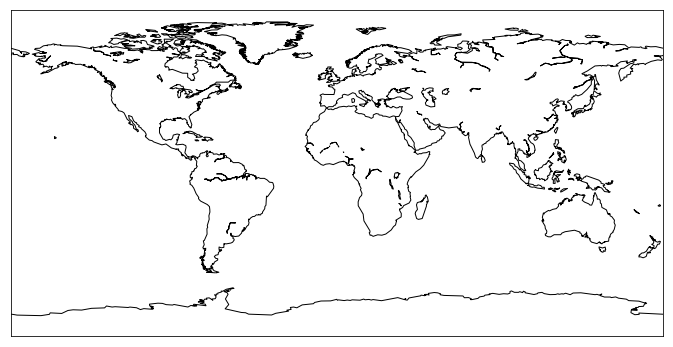

In [2]:
plt.figure(figsize=(12,6))
map = Basemap()
map.drawcoastlines()
plt.show()

Nun ein Beispiel für eine alternative Kartenprojektion. <br>
- `projection='merc'` sorgt für die Ausgabe mit Mercator Projektion <br>
- `llcrnrlat,llcrnrlon` übergeben die Werte für lower left corner Längen/Breitengrad <br>
- `urcrnrlat,urcrnrlon` übergeben die Werte für upper right corners Längen/Breitengrad <br>
- Die Funktion `drawcoastlines` macht das, was man von einer Funktion mit diesem Namen erwartet.

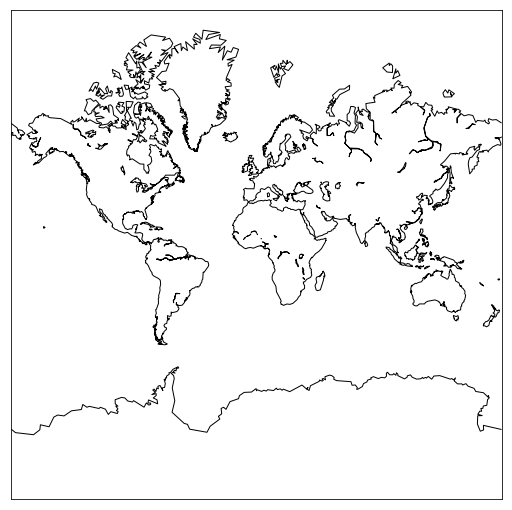

In [3]:
plt.figure(figsize=(20,9))
map = Basemap(projection='merc',llcrnrlat=-85,urcrnrlat=85, llcrnrlon=-180,urcrnrlon=180)
map.drawcoastlines()
plt.show()

Mit den Funktionen `fillcontinents` und dem Setzen des Parameters `fill_color` in der Funktion `drawmapboundary` bringen wir etwas Farbe ins Spiel.
`drawmapboundary` zeichent einen Rahmen um die Map und füllt diesen mit der angegebenen Farbe. Wenn nun die Kontinente darauf gezeichnet werden, wirkt dies wie der Ozean.

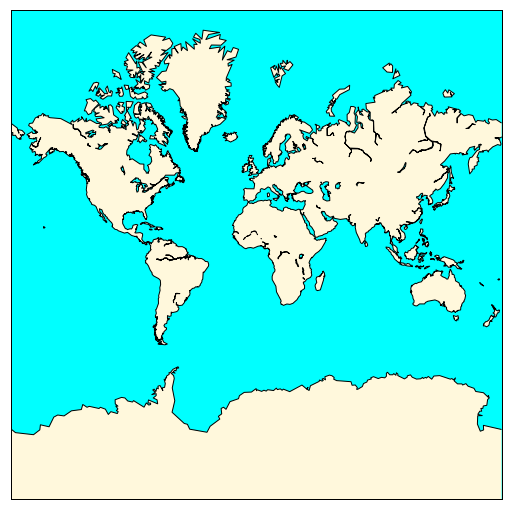

In [4]:
plt.figure(figsize=(20,9))
map.drawmapboundary(fill_color='aqua')
map.drawcoastlines()
map.fillcontinents(color='cornsilk')
plt.show()

- Mit der Funktion `bluemarble` wird ein Satellitenbild der NASA als Hintergrund gezeichnet. 
- `drawcountries` fügt die Staatsgrenzen ein. 

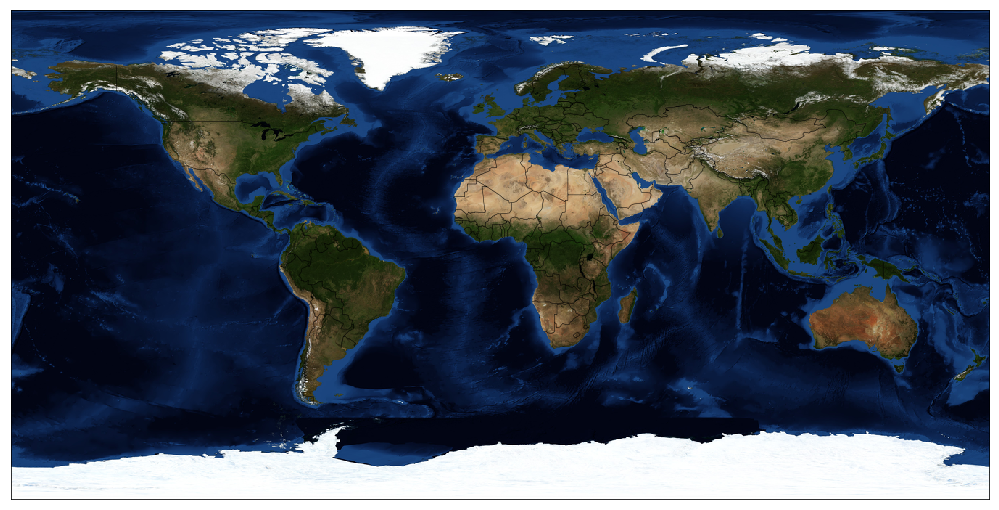

In [5]:
plt.figure(figsize=(20,9));
map = Basemap();
map.bluemarble(scale=0.25);
map.drawcountries();
plt.figure(figsize=(12,6));
plt.show();

>Die Idee für folgendes Beispiel stammt von Eric Matthes (im Original hier zu finden: https://peak5390.wordpress.com/2012/12/08/matplotlib-basemap-tutorial-plotting-global-earthquake-activity/) <br> 
Das Einlesen der Daten wurde für die Bibliothek Pandas unter der Verwendung von DataFrames adaptiert. <br>
Den nötigen Datensatz hierzu findet ihr im Repository. Wer aktuelle Daten verwenden möchte, findet diese hier: https://earthquake.usgs.gov/earthquakes/search/. <br>
Einfach unter der Rubrik "Output Options" CSV wählen. Die hier verwendeten Daten stammen vom 02. Juni 2017.

In [6]:
import pandas as pd

Zunächst lesen wir die Datei mit den Daten ein:

In [7]:
df = pd.read_csv("../daten/Kartendarstellung/all_week.csv")


>Um die Punkte, die wir im weiter unten folgenden Schritt als Visualisierung für die Erdbeben auf die Karte legen, besser einordnen zu können, gibt die Funktion `get_marker_color` in Abhängigkeit der Magnitude des Erbenbens jeweils eine andere Farbe zurück.

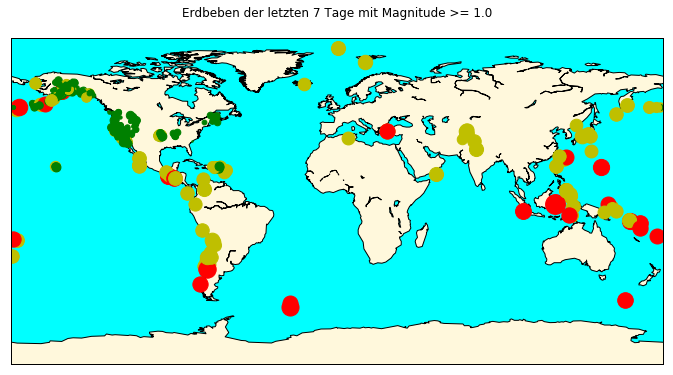

In [8]:
# Nun wird die Weltkarte erstellt, so wie wir es bereits kennen.
plt.figure(figsize=(12,6))
map = Basemap()
map.drawmapboundary(fill_color='aqua')
map.drawcoastlines()
map.fillcontinents(color='cornsilk',lake_color='aqua')

def get_marker_color(magnitude):
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')
    
# Hier werden nun die Marker auf der Karte eingezeichnet. Die Größe der Kreise wird in
# Abhängigkeit der Magnitude berechnet.
min_marker_size = 3
for lon, lat, mag in zip(df["longitude"], df["latitude"], df["mag"]):
    x,y = map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    map.plot(x, y, marker_string, markersize=msize)
    
# Schließlich versehen wir die Karte mit einer Überschrift 
# und lassen sie ausgeben:
title_string = "Erdbeben der letzten 7 Tage mit Magnitude >= 1.0\n"
plt.title(title_string)
plt.show()

>Notiz am Rande:<br>
2016 wurde angekündigt, dass `basemap` mittelfristig durch `cartopy` ersetzt werden soll. Allerdings werden viele Funktionalitäten, die `basemap` bereitstellt, noch nicht durch `carptopy` unterstützt. 
Ben Root hat sich bereiterklärt, die Betreuung des Paketes bis 2020 zu übernehmen. Bis dahin werden Fehler verbessert und die Kompatibilität zu abhängigen Pakten wie `NumPy` und `Matplotlib` sichergestellt. Auch neue Funktionalitäten können noch hinzukommen. Allerdings wird bereits auf der Website von `basemap` gebeten, stattdessen doch lieber die Weiterentwicklung von `Cartopy` zu unterstützen.

# Kartendarstellung mit ipyleaflet

Wie wir gesehen haben, lassen sich mit `basemap` in kurzer Zeit Daten visualisieren. Was die optische Aufarbeitung anbelangt stößt man dabei recht schnell an die Grenzen dieser Bibliothek. Hier spielt die Bibliothek `ipyleaflet` ihre Stärken aus. Mit wenigen Programmzeilen lassen sich interaktive Karten erstellen, die Open Street Map einbinden. Und auch wenn es um die dynamische Visualisierung von Daten geht, bietet diese Biliothek eine Vielzahl von Möglichkeiten, die mit `basemap` überhaupt nicht oder nur mit sehr viel mehr Aufwand umzusetzen wären.

`ipyleaflet` ist ein Paket, welches unter Python die JavaScript Bibliothek `leaflet` für die Ausgabe einbindet. So kam auch der Name zustande: `leaflet` für `ipy`thon (bzw. heute Jupyter). `Leaflet` ist open-source und lediglich 38 Kilobyte groß, hat aber trotzdem einen enormen Funktionsumfang.

Installation

Unter Verwendung von *pip*:

```
$ pip install ipyleaflet
$ jupyter nbextension enable --py --sys-prefix ipyleaflet
```
Unter Verwendung von *conda*:
```
$ conda install -c conda-forge ipyleaflet
```

Hinweis: Unter Umständen muss das Notebook neu gestartet werden nach der Installation des Pakets

Um die Pakete in userem Notebook verwenden zu können, müssen sie noch importiert werden:

In [1]:
from ipyleaflet import *

Zunächst ein paar grundlegende Funktionalitäten:

Wir legen einen Mittelpunkt (Längen und Breitengrad), sowie eine Zoomstufe für unsere darzustellende Karte fest:

In [2]:
center = [34.6252978589571, -77.34580993652344]
zoom = 10

Nun lassen wir die Karte darstellen:

In [3]:
m = Map(default_tiles=TileLayer(opacity=1.0), center=center, zoom=zoom)
m

In diesem Fall macht es wenig Sinn, aber zur Veranschaulichung des Layer Ansatzes enfernen wir das einzige zur Zeit vorhandenen Layer (die Karte). Übrig bleibt die Gundstruktur des Widgets.

In [4]:
m.remove_layer(m.default_tiles)

Und so fügen wir das Layer wieder hinzu:

In [5]:
m.add_layer(m.default_tiles)

Mit der Funktion bounds können wir uns ausgeben lassen, welcher Bereich auf der Karte nun dargestellt wird:

In [6]:
m.bounds

[(34.39897808891371, -78.03314208984375),
 (34.85100201839405, -76.65710449218749)]

Nun zu einem der bereits erwähnten interaktiven Elementen:

In [7]:
m.interact(zoom=(5,10,1)) 

So lassen sich Marker auf die Karte setzen (`m.center` entspricht der Mitte der gerade angezeigent Karte):

In [8]:
mark = Marker(location=m.center)

Noch erscheint er nicht auf der Karte, da wir das entsprechende Layer noch nicht auf unsere Map gelegt haben. Die Sichtbarkeit von Layern lässt sich abfragen:

In [9]:
mark.visible

False

Nun fügen wir den Marker zur Map hinzu.

In [10]:
m += mark

In [11]:
mark.visible

True

Auch das Hinzufügen von Grafikelementen ist möglich:

In [12]:
pl = Polyline(locations=m.bounds_polygon)
m += pl

In [13]:
m

In [14]:
pl.fill_color = '#FF0000'
pl.fill_opacity = 1.0

Wir können die Deckkraft der Grafikelemente über das Verändern des Attributes fill_opacity beeinflussen. Dies ist auch über einen interaktiven Schieberegeler möglich:

In [15]:
pl.interact(fill_opacity=(0.0,1.0,0.01))

Und so entfernen wir das Grafikelement wieder von der Map:

In [16]:
m -= pl

Weitere Grafikfunktionen von `ipyleaflet` jeweils als Beispiel in der Übersicht:
```python
Polygon(locations=m.bounds_polygon, weight=3,
            color='#F00', opacity=0.8, fill_opacity=0.8,
            fill_color='#0F0')

Rectangle(bounds=m.bounds, weight=10, fill_opacity=0.0)

Circle(location=m.center)

CircleMarker(location=m.center, radius=30, weight=2,
                  color='#F00', opacity=1.0, fill_opacity=1.0,
                  fill_color='#0F0')
                  
ImageOverlay(url='http://website.org/dies_ist_ein_bild.png', bounds=m.bounds)
```

### Darstellung von Daten im GeoJSON-Format

>Das folgende Beispiel zur Verwendung von GeoJSON Dateien mit der ipyleaflet Bibliothek ist angelehnt an ein Notebook aus dem Repository des Entwicklers von ipyleaflet Quelle:  https://github.com/ellisonbg/ipyleaflet/blob/master/examples/GeoJSON.ipynb <br>
Als Daten werden frei zugängliche Daten der Stadt Ulm genutzt. Quelle: http://daten.ulm.de/datenkatalog/offene_daten <br>
Im Lehrbuch-Repository befinden sich die nötigen Dateien in leicht aufgearbeiteter Form.

In [17]:
import pandas as pd

In [18]:
m1 = Map(center= [48.39, 9.98], zoom=12, layout=Layout(height='800px'))

In [19]:
ulm = pd.read_csv('../daten/Kartendarstellung/ulm_stat.CSV',sep=';',encoding='iso8859_15')

In [20]:
ulm.head()

,Stadtteil,m,w,ev,kath,sonst,ledig,verh,verw,gesch,Einwohner
0,Mitte,0.492239,0.507761,0.247521,0.321436,0.431043,0.520000,0.329368,0.066462,0.084171,14625
1,Oststadt,0.489487,0.510513,0.260897,0.320128,0.418974,0.503590,0.350513,0.068590,0.077308,7800
2,Boefingen,0.478428,0.521572,0.289150,0.323940,0.386910,0.388287,0.465210,0.073160,0.073343,10894
3,Weststadt,0.484280,0.515720,0.224353,0.305965,0.469682,0.473051,0.386992,0.057582,0.082375,22264
4,Eselsberg,0.482968,0.517032,0.242265,0.323463,0.434272,0.463941,0.411428,0.051645,0.072986,17291


Wir wollen nun auf unserer Karte die Stadtteile entsprechend des betrachteten Attributes färben. Je höher der Wert des betrachteten Attributes ist, desto dunkler soll der Stadtteil später eingefärbt sein. 

Unter der Verwendung von `matplotlib` Funktionen wird durch `data_to_colors` in Abhängigkeit des Wertebereiches des Attributdaten und der Anzahl der betrachteten Datenzeilen eine Liste mit Farben im HEX-Code erstellt.

In [21]:
import matplotlib as mpl
import matplotlib.cm
import matplotlib.colors

def data_to_colors(data, colormap=mpl.cm.plasma):
    c = [mpl.colors.rgb2hex(d[0:3]) for d in colormap(mpl.colors.Normalize()(data))]
    return c

In [22]:
colors = data_to_colors(ulm.loc[:, 'verh'], colormap=mpl.cm.Blues)


In [23]:
zips = ulm['Stadtteil']

Nun werden zusammengehörige Stadtteile und Farben in einer Datenstruktur gespeichert: 

In [24]:
cols = {}
for i in range(len(zips)):
    cols[zips[i]] = colors[i]

Hier wird die GeoJSON Datei mit den Stadtteilgrenzen von Ulm geladen. Dafür ist zuvor ein Import der Bibliothek `json` nötig:

In [25]:
import json
with open("../daten/Kartendarstellung/ulm_stadtteile.geo.json") as f:
    data = json.load(f)

Nun erstellen wir eine neue Style-Eigenschaft in den Features unserer Daten. Ein Feature entspricht hier einem Stadtteil. Aus den oben "berechneten" Farben wird die entsprechende Farbe Style-Attribut `color` zugewiesen. `Weight` gibt übrigens die Strichstärke der Stadteilgrenzen an.

In [26]:
for feature in data['features']:
    feature['properties']['style'] = {
        'color': cols[feature['properties']['STADTTEIL']],
        'weight': 1,
        'fillColor': cols[feature['properties']['STADTTEIL']],
        'fillOpacity': 0.7,
    }

Jetzt müssen wir nur noch die modifizierten Daten einem Layer zuweisen und dieses auf die Karte legen:

In [27]:
g = GeoJSON(data=data)
m1 += g

In [28]:
m1

Wenn in der GeoJSON Datei einfache Positionsdaten vorliegen, können wir diese mit der oben bereits verwendeten Funktion GeoJSON() einem Layer zuweisen. Als Beispiel dient hier die GeoJSON Datei mit den Standorten aller Kindertagesstätten (KiTas) in Ulm.

In [29]:
with open('../daten/Kartendarstellung/ulm_kitas.json') as f:
    kitas = json.load(f)

In [30]:
k = GeoJSON(data=kitas)

In [31]:
m1.add_layer(k)

Zu guter Letzt schauen wir uns an, wie man auch diese Bibliothek zur Visualisierung unseres Erdbeben-Datensatzes nutzen kann.
Wir erstellen zunächst ein Map-Layer, welches als Ausschnitt Deutschland zeigt.

In [32]:
deutschland = Map(center= [50.78, 10], zoom=6, layout=Layout(height='800px'))

Nun öffnen wir unseren Bekannten Geo-JSON Datensatz mit den Erdbeben in und um Deutschland herum. 

In [33]:
with open('../daten/Kartendarstellung/erdbeben_deutschland.geojson') as f:
    eqs = json.load(f)

In [34]:
f = eqs['features']

Auch hier wird die Größe des Kreises abhängig von der Magnitude sein. Allerdings kommt die Circle-Funktion von `ipyleaflet` nur mit Integer-Werten für den Radius klar, deshalb müssen wir den Wert runden. Der davorstehende Faktor entspricht übrigens Metern auf der Karte. Ein Erdbeben mit der Stärke 1 hätte also einen Durchmesser von 10km. 

Desweiteren können die Koordinaten nicht ohne weiteres aus der GeoJSON-Übernommen werden. Die `ipyleaflet` Funktion `Circle` erwartet für die Position des Kreises nämlich zuerst den Längen- und dann den Breitengrad. In der GeoJSON Datei liegen die Daten in der umgekehrten Reihenfolge vor.

In [35]:
for feature in eqs['features']:
    try:
        long = feature['geometry']['coordinates'][0]
        lat = feature['geometry']['coordinates'][1]
        deutschland += Circle(location=[lat, long],radius=5000*(round(feature['properties']['mag'])))
    except KeyError:
        print("error")

In [36]:
deutschland

### Quellen:
- https://www.timeanddate.de/geographie/laengengrad-breitengrad
- http://www.spektrum.de/lexikon/geowissenschaften/world-geodetic-system/18384
- https://de.wikipedia.org/wiki/World_Geodetic_System_1984
- https://de.wikipedia.org/wiki/Kartennetzentwurf
- http://desktop.arcgis.com/de/arcmap/10.3/manage-data/shapefiles/what-is-a-shapefile.htm
- http://geojson.org/
- https://cran.r-project.org/web/packages/mapplots/mapplots.pdf
- https://media.readthedocs.org/pdf/basemaptutorial/latest/basemaptutorial.pdf
- https://peak5390.wordpress.com/2012/12/08/matplotlib-basemap-tutorial-plotting-global-earthquake-activity/
    
### Daten:
- http://opendata-esri-de.opendata.arcgis.com/datasets/osm-de-hochschulen
- https://www.zensus2011.de/DE/Infothek/Begleitmaterial_Ergebnisse/Begleitmaterial_node.html
- https://earthquake.usgs.gov/earthquakes/search/
- http://daten.ulm.de/datenkatalog/offene_daten 